# Q learning

## Betting task: the strong-willed gambler in a casino, with the probability of winning a bet equal to $p$

Rules of the game: at any time, you have a capital $x$ between 0 and $n$. $x$ is an integer.

You are strong-willed: if your capital $x\ge n$,  you leave the casino and you do not return. You keep your capital $x$, which is your final payoff. 

If $x=0$, then you have no more money, and you leave the casino with nothing. Your final payoff is 0. 

If $0 < x < n$, you bet. Your possible actions are to bet any integer amount between 1 and $x$, inclusive. you cannot bet more than you own, so your maximum bet is $x$.

Let your bet be $a$, such that $1 \le a \le x$. 

If you win,your next state is $x+a$; if you lose, your next state (amount of capital) is $x-a$.  

You win with probability $p$, which is fixed for the duration of your gambling session. 

Your expected next capital is therefore:

$$E[x'] = p (x+a) + (1-p)(x-a) = x + (2p-1)a$$

If $p< 1/2$, your expected next capital $x'$ is less than your current capital $x$: on average, you lose. But you can still leave the casino a winner if you are lucky.  What is your best betting policy for doing so? If your capital is $x$, what is the average amount of your final capital, if you follow an optimal policy? 

If $p>1/2$, the casino is generous, and on average pays you!  But you can still go bust and leave with zero if you are unlucky. Again, what is your best betting policy?

Different casinos may have different values of $p$. What is your optimal $Q$ function, given $n$ (your strong-willed choice of when to leave the casino) and $p$, the probability of winning when you bet, which is a constant value in th casino?



In [1]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

### The Cautious but Strong-Willed Gambler

Suppose that you are a cautious person who likes to place small bets: you decide that you only feel comfortable betting 1 unit on each turn, until you either reach a wealth of $n$, or $0$.  What is your expected winnings with this policy? Is the optimal policy better? By how much? 



### Finding the optimal gambling policy

In [2]:
def optimal_action(Q,x):
    # finds the optimal 
    n = Q.shape[0]
    if x <= 0:
        return 0 # no bets possible with zero wealth
    elif x >=n: 
        return 0 # game is over, gambler has left casino
    else: 
        return np.argmax( Q[x,1:x+1]) + 1 # note that we have extracted a slice starting at index 1, so 
          # we need to add one to the index to retrieve the correct index within the Q matrix
        
def optimal_policy(Q):
    # returns a list of optimal action in each state
    n = Q.shape[0]
    return [ optimal_action(Q,x) for x in range(0,n) ]


In [87]:

def state_value( Q, x):
    
    assert x >= 0 
    print("==============")
    print(Q)
    n = Q.shape[0]
    v=0
    if x == 0: # all money lost
        v= 0 
    elif  x >= n:
        v= x # the strong-willed gambler leaves the casino 
                # when wealth >= n 
    else: 
        
        print(Q[x,1:x+1])
        v= np.max( Q[x,1:x+1]) # return the largest Q value for 
                            # the best action in the next state
    print("sv: ",v)
    return v

In [88]:
# Value iteration - apply all possible experiences once
def value_iterate( Q, p=0.5):
    n = Q.shape[0]
    for x in range(1,n):
        for a in range(1,x+1): # we can bet our entire fortune x on one throw
            print("-------------------------")
            p1= p * state_value(Q,x+a)
            p2= (1-p) * state_value(Q,x-a)
            print(x,a,p1,p2)
            Q[x,a] = p1+p2


In [106]:
n = 4
p = 0.4
# Q[x,a] is the Q value for wealth x and a bet of a

# when x reaches n or above, the game is over and the final payoff is received
Q = np.zeros([n,n])

In [107]:
for i in range(0,3):
    print("++++++++++++++++++++++")
    value_iterate(Q,p=p)

++++++++++++++++++++++
-------------------------
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0. 0.]
sv:  0.0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
sv:  0
1 1 0.0 0.0
-------------------------
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0. 0. 0.]
sv:  0.0
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[0.]
sv:  0.0
2 1 0.0 0.0
-------------------------
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
sv:  4
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
sv:  0
2 2 1.6 0.0
-------------------------
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  1.6 0. ]
 [0.  0.  0.  0. ]]
sv:  4
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  1.6 0. ]
 [0.  0.  0.  0. ]]
[0.  1.6]
sv:  1.6
3 1 1.6 0.96
-------------------------
[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   1.6  0.  ]
 [0.   2.56 0.   0.  ]]
sv:  5
[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   1.6  0.  ]
 [0.   2.56

[[0.    0.    0.    0.   ]
 [0.    0.64  0.    0.   ]
 [0.    1.408 1.6   0.   ]
 [0.    2.56  2.384 2.4  ]]


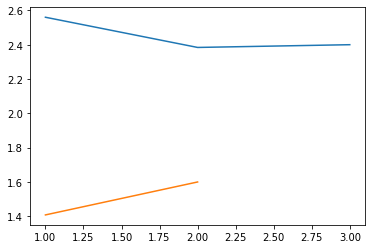

In [108]:
print(Q)
plt.plot(range(1,n),Q[n-1,1:])
plt.plot(range(1,n-1),Q[n-2,1:n-1])

You may find this graph quite confusing: the x axis is the size of the bet: the y axis is the optimal Q value for this bet, from the state you are in, which is $n-1$. 

Can you see intuitively why the Q value decreases for larger bets?  Can you see intuitively why the Q value starts to increase again, for very large bets? 

What should the Q value be for betting all of your capital: can you work this out directly by hand? 

[[0.    0.    0.    0.   ]
 [0.    0.64  0.    0.   ]
 [0.    1.408 1.6   0.   ]
 [0.    2.56  2.384 2.4  ]]
sv:  0
[[0.    0.    0.    0.   ]
 [0.    0.64  0.    0.   ]
 [0.    1.408 1.6   0.   ]
 [0.    2.56  2.384 2.4  ]]
[0.64]
sv:  0.6400000000000001
[[0.    0.    0.    0.   ]
 [0.    0.64  0.    0.   ]
 [0.    1.408 1.6   0.   ]
 [0.    2.56  2.384 2.4  ]]
[1.408 1.6  ]
sv:  1.6
[[0.    0.    0.    0.   ]
 [0.    0.64  0.    0.   ]
 [0.    1.408 1.6   0.   ]
 [0.    2.56  2.384 2.4  ]]
[2.56  2.384 2.4  ]
sv:  2.56
[[0.    0.    0.    0.   ]
 [0.    0.64  0.    0.   ]
 [0.    1.408 1.6   0.   ]
 [0.    2.56  2.384 2.4  ]]
sv:  4


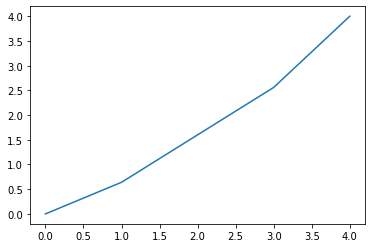

In [99]:
# Now plot the optimal values of states: that

values = [ state_value(Q,x) for x in range(0,n+1)]

plt.plot( range(0,n+1), values)

[0, 1, 2, 1]


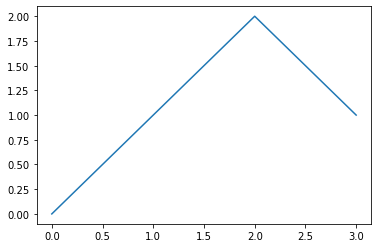

In [109]:
policy = optimal_policy(Q)

plt.plot( policy )
print(policy)

### Q learning

Now try Q learning. This formulation makes it clear that Q learning is a randomised form of value iteration. 

You may need a large number of trials to 'learn' a Q function close to the optimal one computed by value iteration. How many? 

This formulation of Q learning is 'off policy'.  Can you try to write an 'on policy' version (this will test your Python programming skills...) 

In [101]:
from random import randint

n = 20
p = 0.2
# Q[x,a] is the Q value for wealth x and a bet of a

# when x reaches n or above, the game is over and the final payoff is received
Q = np.zeros([n,n])

In [102]:
n_trials = 1000 # you will need to make this much larger

learning_rate = 0.1 # start large, then make it smaller

for i in range(0,n_trials):
    x = randint(1,n-1)
    a = randint(1,x)
    if np.random.rand() < p:
        xprime = x+a
    else:
        xprime = x-a   
    Q[x,a] = (1-learning_rate)*Q[x,a] + learning_rate * state_value(Q,xprime)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0

sv:  0
[[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.  

  0.000e+00 0.000e+00 0.000e+00 3.600e+00 0.000e+00 0.000e+00]]
[0. 0. 0.]
sv:  0.0
[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.00

  3.4000000e+00 0.0000000e+00 3.6000000e+00 0.0000000e+00 0.0000000e+00]]
[0.        0.        0.0001782]
sv:  0.00017820000000000005
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]

  0.00000000e+00 3.60000000e+00 0.00000000e+00 0.00000000e+00]]
[0.0342225  0.         0.         0.         0.         0.00308003
 0.         0.         0.         2.        ]
sv:  2.0
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.44342000e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

  0.00000000e+00 3.60000000e+00 3.70000000e+00 0.00000000e+00]]
[0.00000000e+00 2.10000000e-01 0.00000000e+00 0.00000000e+00
 2.25000000e-03 0.00000000e+00 0.00000000e+00 2.77202250e-03
 1.78478984e+00 3.38580000e-05 2.40000000e+00 0.00000000e+00
 0.00000000e+00]
sv:  2.4000000000000004
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.99928104e-06 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.54271561e-05 2.77202250e-03 0.00000000e+00
  0.00000000e+00 0.00000000e

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.50793753e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.38283669e-05 2.77202250e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.28905698e-04 2.46824820e-07 1.05225318e-04
  0.0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

